# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открою файл с данными и изучу общую информацию. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем первые 5 строк таблицы

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- Из фрагмента таблицы видно, что есть столбец с временем, который необходимо изменить
- есть пропуски в данных, которые нужно будет заполнить

Получим общую информацию о данных


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем гистограммы по числовым данным

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

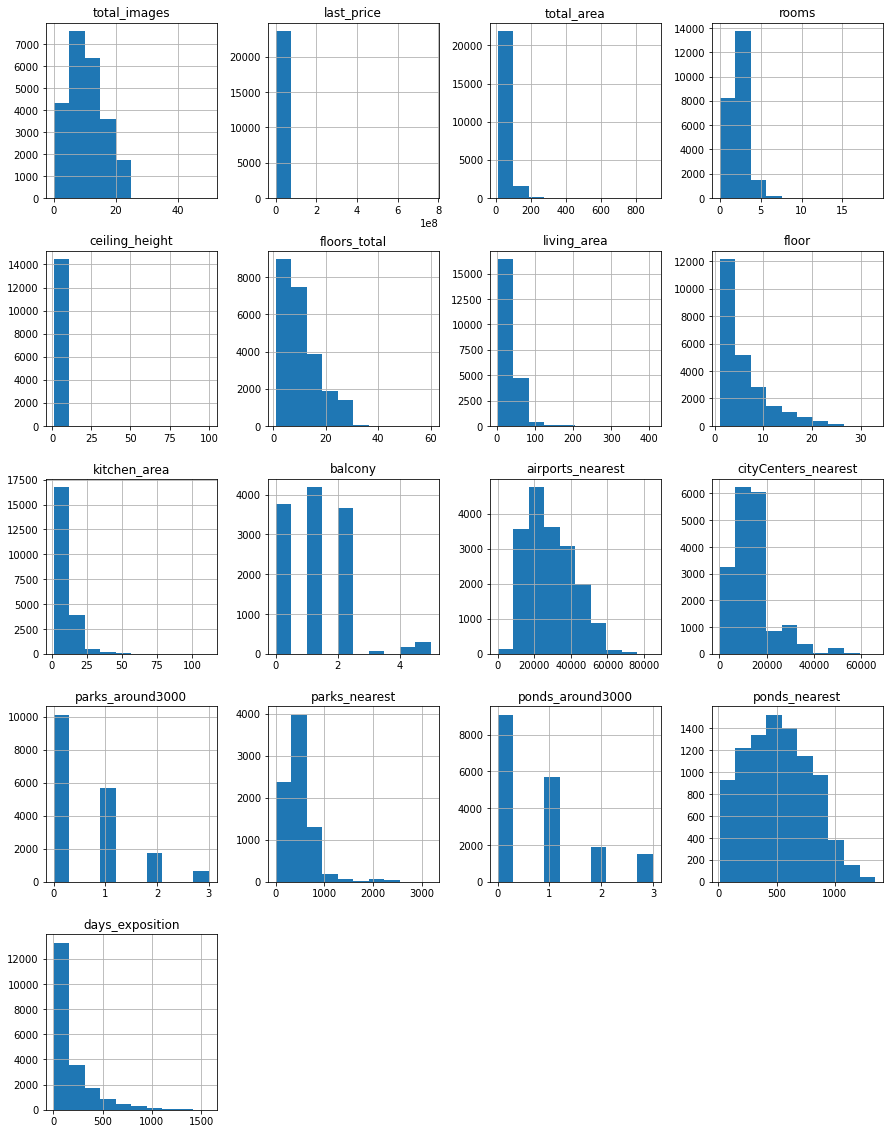

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Работа с пропусками в `ceiling_height`

Построю гистограмму

<AxesSubplot:ylabel='Frequency'>

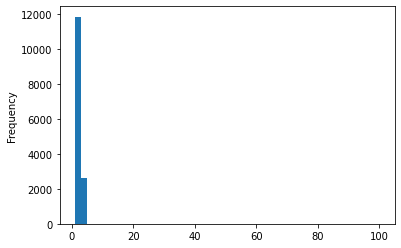

In [8]:
data['ceiling_height'].plot.hist(bins=50)

На данной гистрограмме в целом не видно выбросов. Высота потолков находится в диапазоне до 5 м. Но стоит изменить масштаб графика, тк значения оси `y` большие и данные могут не отображаться.

Также посмотрю на масимальные и минимальные значения столбца 

<AxesSubplot:ylabel='Frequency'>

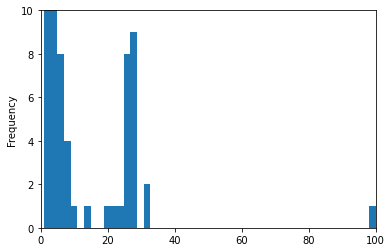

In [9]:
data['ceiling_height'].plot.hist(ylim=(0,10), xlim=(0,100), bins=50)

Теперь картина кардинально изменилась. Появились квартиры с высотой потолков более 10 метров. Причем обращают на себя внимание квартиры, потолки которых 25 м. Также есть и 100 м высота.

Такие данные кажутся некорректными. 

Ведь средняя высотка потолка находится около отметки в 3 м.

ТАкже много квартир с низкими потолками. Стоит отметить, что в нормативных документах (СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные») прописано, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.

Исходя из этого буду считать минимальную высоту потолка - 2,5 м.

Стоит определить и максимальную высоту потолков.
Если это квартиры, то возьмем приемлемую высоту потолков в 4 м.

Посмотрим как некорректные данные влияют на среднее и медианное значения


In [10]:
data['ceiling_height'].mean()

2.77149889685604

In [11]:
data['ceiling_height'].median()

2.65

In [12]:
data['ceiling_height'].max()

100.0

In [13]:
data['ceiling_height'].min()

1.0

Медиана не сильно отличается от среднего. У нас дата сет на 23т наблюдений. 
Посмотрю, сколько квартир, потолки которых более 4 м.


In [14]:
len(data.query('ceiling_height>4'))

75

Таких данных всего 75 строк.
Заполню пропуски медианными значениями и удалю квартиры, где высота потолков более 4 м.

In [22]:
# Код 

data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

In [24]:
data['ceiling_height'].max()

100.0

In [25]:
data['ceiling_height'].min()

1.0

Теперь максимальная высота потолка 10 м, , минимальная 1.

Заполню пропуски медианными значениями

In [26]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [27]:
len(data.query('ceiling_height>=4'))

92

Теперь квартир с потолками более 4 м - 90 шт. 

In [28]:
len(data.query('ceiling_height<2.5'))

76

А с потолками менее 2,5 м - 78. Не намного уведилились данные. Но зато появились квартиры в диапазоне 2,5-4 м, которые ранее я удалил.

In [29]:
len(data.query('2.5<=ceiling_height<=4'))

23570

Теперь гистограмма выглядит так

<AxesSubplot:ylabel='Frequency'>

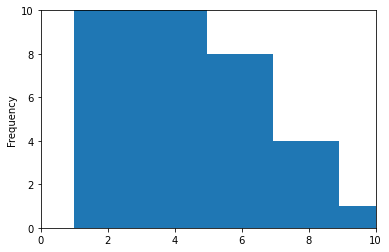

In [30]:
data['ceiling_height'].plot.hist(ylim=(0,10), xlim=(0,10), bins=50)

In [31]:
len(data.query('ceiling_height<2.5 or ceiling_height>4'))

129

Таких хвартир всего пол процента, поэтому их можно удалить из выборки

In [32]:
data = data.query('2.5<=ceiling_height<=4')

In [33]:
len(data)

23570

#### Работа с пропусками в `floors_total`

Посмотрю существующие данные. Определю максимальное и минимальное значение.

In [34]:
data['floors_total'].max()

60.0

In [35]:
data['floors_total'].min()

1.0

60 этажей - достаточно много и неправдоподобно. Построю гистограмму.

<AxesSubplot:ylabel='Frequency'>

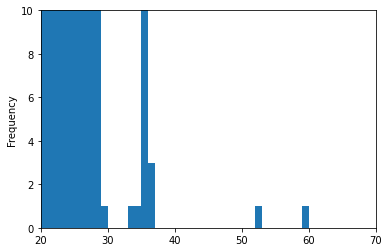

In [36]:
data['floors_total'].plot.hist(ylim=(0,10), xlim=(20,70), bins = 59)

Этажность жилых зданий в 50-60 этажей выглядит как выброс. Таких данных всего несколько, поэтому удалю их.

In [37]:
data = data.query('floors_total<50')

Теперь в столбце не осталось пропущенных значений

In [38]:
data = data.reset_index(drop=True)

In [39]:
len(data)

23482

<AxesSubplot:ylabel='Frequency'>

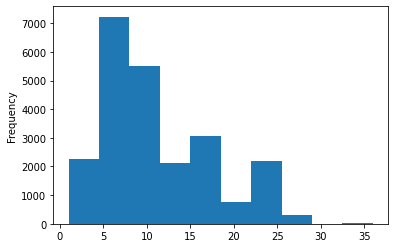

In [40]:
data['floors_total'].plot.hist(bins = 10)

**Таким образом, наиболее популярные дома - с 5, 9-ью этажами**

#### Работа с пропусками в `living_area`

In [41]:
data['living_area'].isna().sum()

1858

In [42]:
data['living_area'].max()

409.7

In [43]:
data['living_area'].min()

2.0

Жилая площадь в 2 метра - странно

<AxesSubplot:ylabel='Frequency'>

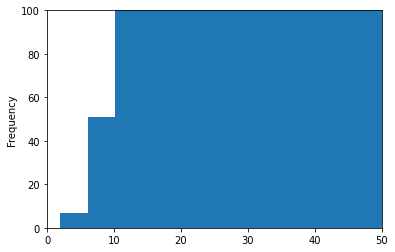

In [44]:
data['living_area'].plot.hist(ylim=(0,100), xlim=(0,50), bins=100)

Уберу из датасета квартиры, жилая площадь которых менее 10 кв.м. Таких данные менее 60. На показатели это не повлияет.

In [45]:
len(data.query('living_area<=10'))

56

In [46]:
data = data.query('living_area>10')

In [47]:
len(data)

21568

In [48]:
data['living_area'].mean()

34.437418931287084

In [49]:
data['living_area'].median()

30.0

Заполню пропуски медианными значениями.

In [50]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [51]:
data = data.reset_index(drop=True)

<AxesSubplot:ylabel='Frequency'>

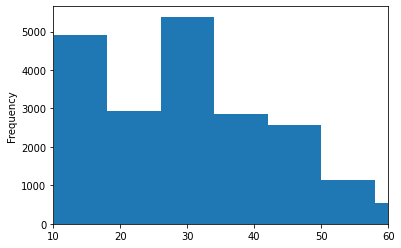

In [52]:
data['living_area'].plot.hist(xlim=(10,60),bins=50)

**ТАким образом, наиболее популярные квартиры с жилой площадью до ~18 кв м и ~от 27 до 34 кв м**

#### Работа с пропусками в `is_apartment`

Тип данных в данном столбце object. Посмотрю уникальные значения.

In [53]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Логично предположить, что если пропущено значение, то квартира не является апартаментами. Поэтому заполним пропуски булевым значением False

In [54]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [55]:
len(data['is_apartment'])

21568

#### Работа с пропусками в `kitchen_area`

In [56]:
data['kitchen_area'].isna().sum()

781

В данных есть пропуски, но сложно представить квартиру без кухни. Поэтому посмотрю на средние и медианные показатели

In [57]:
data['kitchen_area'].mean()

10.48985904651946

In [58]:
data['kitchen_area'].median()

9.0

Заполню пропуски медианным значением

In [59]:
data['kitchen_area']  = data['kitchen_area'].fillna(data['kitchen_area'].median())

#### Работа с пропусками в `balcony`

In [60]:
data['balcony'].max()

5.0

In [61]:
data['balcony'].min()

0.0

In [62]:
data['balcony'].isna().sum()

10010

В данном случае неверно будет заполнять значения количества балконов средним или медианой. Скорее всего, если значение пропущено, то балкона нет. ЗАполним пропуски нулями

In [63]:
data['balcony'] = data['balcony'].fillna(0)

#### Работа с `locality_name`

Посмотрю уникальные значения столбца

In [64]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

Просмотрю список. Произведу замены:

In [65]:
len(data['locality_name'].unique())

349

In [66]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [67]:
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово','Кудрово')

In [68]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

In [69]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

In [70]:
data['locality_name'] = data['locality_name'].str.replace('деревня ','')

In [71]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [72]:
len(data['locality_name'].unique())

305

Таким образом, из 363 позиций осталось 305. Стоит отметить, что существует тип данных `nan`. Не буду удалять эти квартиры.

Мы не можем определить, из какого города квартира. Квартир без города 48 шт.

#### Работа с пропусками в `airports_nearest`

In [73]:
data['airports_nearest'].max()

84869.0

In [74]:
data['airports_nearest'].min()

0.0

Данные указаны в метрах. 84 км - показатель правдоподобный, тк квартиры расположены в области.

А вот 0 м до аэропорта - звучит как ошибка.

Посмотрю, сколько квартир в радиусе 1,5 км до аэропорта.

In [75]:
data.query('airports_nearest<1500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19200,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Всего одна квартира, где указано расстояние до аэропорта 0м. Удалюю ее



In [76]:
data = data.query('airports_nearest>1500 or airports_nearest.isna()')

In [77]:
data = data.reset_index(drop=True)

In [78]:
len(data)

21567

Также есть данные, где расстояние не указано. Можно предположить, что квартиры далеко и по близости аэропорта нет. Такие данные удалять нельзя. Ведь, если указывать расстояние до аэропорта, то на рынке жилья - это фактор, который влияет на стоимость. 

Поэтому оставлю без изменений

#### Работа с пропусками в `cityCenters_nearest`

Здесь есть разные значения. Пропуски являются также важным показателем. Ведь если квартира в области - она может быть в селе. И продавцы просто могли не разместить инфомрацию о расстоянии до центра.

В данном случае не нужно заполнять пропуски медианными или средними значениями, ведь это фактор, влияющий на стоимость квартиры

#### Работа с пропусками в `parks_nearest`


#### Работа с пропусками в `ponds_nearest`

Работа с данными колонками происходит аналогично с пунктом 2.9. Если расстояние не указано - это не значит, что квартира нахожится в парке. Следовательно, не буду заполнять пропуски значениями.


#### Работа с пропусками в `parks_around3000`

#### Работа с пропусками в `ponds_around3000`


Данные в столбцах описывают числов прудов и парков поблизости. Если есть пропуски в данных, то предположу, что поблизости нет таковых объектов. Поэтому заполню пропуски нулями

In [79]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [80]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#### Работа с пропусками в `days_exposition`

Стоит сказать, что это архив объявлений. Значит, что квартиры уже проданы. 

Посмотрю как распределена длительность продажи квратир на графике.

In [81]:
data['days_exposition'].max()

1580.0

In [82]:
data['days_exposition'].min()

1.0

<AxesSubplot:>

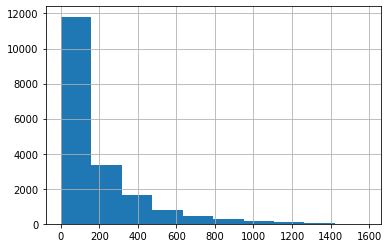

In [83]:
data['days_exposition'].hist()

In [84]:
data['days_exposition'].mean()

184.84076501557968

In [85]:
data['days_exposition'].median()

101.0

По анализу среднего и медианы видно, что среднее почти в 2 раза больше медианы. Существуют квартиры, срок продажи которых велик. Поэтому среднее значение такое большое.

Происходит перекос данных. Поэтому заполню пропуски медианными значениями

Заранее добавлю столбец года в таблицу

In [87]:
from datetime import datetime, timedelta

In [88]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [89]:
data['year']=data['first_day_exposition'].dt.year

In [90]:
data['isna_de']=data['days_exposition'].isna()

In [91]:
data.groupby('year')['isna_de'].sum()

year
2014      18
2015      65
2016      66
2017     249
2018     893
2019    1662
Name: isna_de, dtype: int64

С каждым годом количество пропусков увеличивается. Причем увеличение происходит большими темпами.

In [92]:
data.groupby('year')['isna_de'].count()

year
2014     130
2015    1109
2016    2638
2017    7587
2018    7435
2019    2668
Name: isna_de, dtype: int64

В 2019 году более половины пропусков в данных.

In [93]:
data.groupby('year')['days_exposition'].median()

year
2014    869.5
2015    570.5
2016    230.0
2017    104.0
2018     70.0
2019     23.0
Name: days_exposition, dtype: float64

In [94]:
data.groupby('year')['days_exposition'].mean()

year
2014    901.660714
2015    644.926245
2016    321.056376
2017    159.507359
2018     97.659737
2019     31.038767
Name: days_exposition, dtype: float64

В среднем квартиры в 2019 года продавались за месяц.

Интересно, что среднее и медианное время из года в год уменьшается.

Получается, год влияет на срок продажи квартиры.

Оставлю пропуски, тк ситуация не однозначная и замена значений может повлиять на результаты исследования.

Работу с пропусками на данном этапе закончу.


Теперь нужно изменить формат данных в столбце **`first_day_exposition`**

Также заменю тип `float` на `int` в столбцах **`floors_total`**, **`floor`**, **`balcony`**, **`parks_around3000`**, **`ponds_around3000`**, **`days_exposition`**

Сделаю это потому, что нецелых чисел в данных столбцах не должно быть. Не половины этажа, балкона, парков, прудов.

Все данные в днях публикации объявления - целые числа.

In [96]:
data[['floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']] = \
data[['floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']].astype(int)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21567 entries, 0 to 21566
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21567 non-null  int64         
 1   last_price            21567 non-null  float64       
 2   total_area            21567 non-null  float64       
 3   first_day_exposition  21567 non-null  datetime64[ns]
 4   rooms                 21567 non-null  int64         
 5   ceiling_height        21567 non-null  float64       
 6   floors_total          21567 non-null  int64         
 7   living_area           21567 non-null  float64       
 8   floor                 21567 non-null  int64         
 9   is_apartment          21567 non-null  bool          
 10  studio                21567 non-null  bool          
 11  open_plan             21567 non-null  bool          
 12  kitchen_area          21567 non-null  float64       
 13  balcony         

**ТАКИМ ОБРАЗОМ, Я ЗАПОЛНИЛ ПРОПУСКИ В ДАТАСЕТЕ, ГДЕ ЭТО НЕОБХОДИМО, И УДАЛИЛ НЕЗНАЧИТЕЛЬНЫЕ ДАННЫЕ, КОТОРЫЕ НЕ ПОВЛИЯЮТ НА РЕЗУЛЬТАТЫ ИССЛЕДОВАНИЯ.**

**ДЛЯ АНАЛИЗА ОСТАЛОСБ 17933 СТРОКИ**

In [98]:
len(data)/23699*100

91.00383982446517

Остался 91% данных

### Посчитайте и добавьте в таблицу новые столбцы

Необходимые столбцы

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [99]:
data['price_metre'] = data['last_price']/data['total_area']

In [100]:
data['publication_day'] = data['first_day_exposition'].dt.weekday

In [101]:
data['month'] = data['first_day_exposition'].dt.month

In [102]:
data['year'] = data['first_day_exposition'].dt.year

Для создания столбца `тип этажа` использую функцию

In [103]:
def floor_type(data):
    floor = data['floor']
    total_floors=data['floors_total']
    if floor==1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

In [104]:
data['type_floor'] = data.apply(floor_type, axis = 1)

In [105]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']

In [106]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].where(data['cityCenters_nearest'].isna(), data['cityCenters_nearest']/1000)

In [107]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

In [108]:
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         8.0
4         NaN
         ... 
21562    34.0
21563     4.0
21564     NaN
21565     NaN
21566     NaN
Name: cityCenters_nearest_km, Length: 21567, dtype: float64

### Проведите исследовательский анализ данных

#### Общая площадь

<AxesSubplot:ylabel='Frequency'>

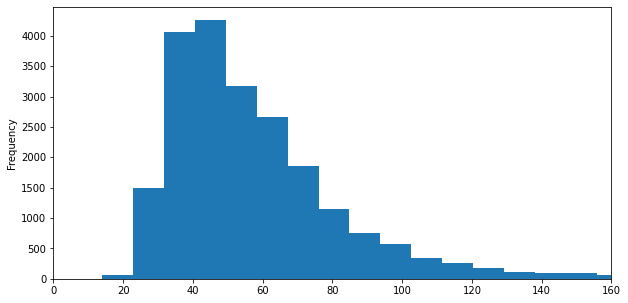

In [109]:
data['total_area'].plot.hist(xlim=(0, 160),bins=100, figsize=(10,5))

- Наиболее популярные квартиры в выборке - от 30 до 50 кв.м.



#### Жилая площадь

<AxesSubplot:ylabel='Frequency'>

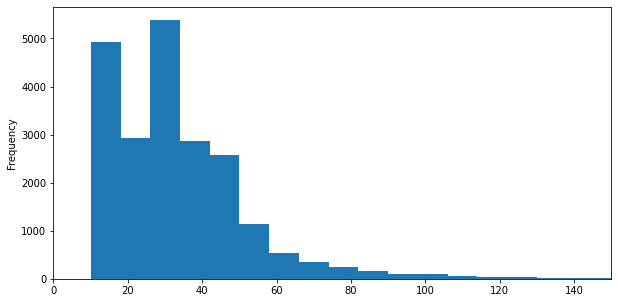

In [110]:
data['living_area'].plot.hist(xlim=(0, 150),bins=50, figsize=(10,5))

Гистограмма похожа на бимодальную. 

Стоит отметить, почему так произошло. 
В данных есть квартиры студии и однокомнатные. Студии по своей площади довольно маленькие квартиры. Также однокомнатных квартир в выборке более 7т.

In [111]:
len(data[data['rooms']==1])

7293

In [112]:
len(data[data['studio']==True])

135

Таким образом, студии и 1-комнатные квартиры занимают более трети наблюдений. Поэтому можно наблюдать бимодальную гистограмму, где более 7 тыс наблюдений - это квартиры с жилой площадью около 20 кв м

#### Площадь кухни

<AxesSubplot:ylabel='Frequency'>

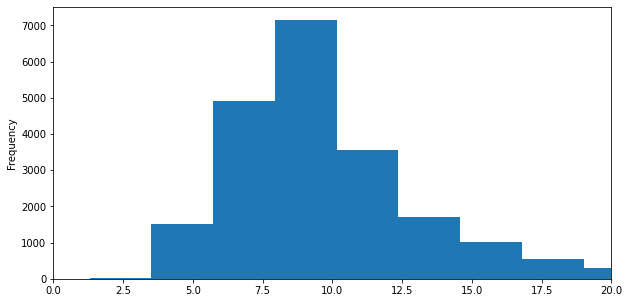

In [113]:
data['kitchen_area'].plot.hist(xlim=(0,20), bins=50, figsize=(10,5))

Распределение квартир по площади кухни можно считать нормальным. 

Здесь как раз прослеживается связь с предыдущим пунктом. В однокомнатных квартирах и студиях небольшие площади отведены под жилье и кухню. На данной гистограмме около 7 т квартир имеют площадь кухни менее 8 кв.м., что не противоречит данным и прошлому графику.

- большую долю занимают квартиру с площадью кухни от 8 до 10 кв.м

#### Цена объекта

<AxesSubplot:ylabel='Frequency'>

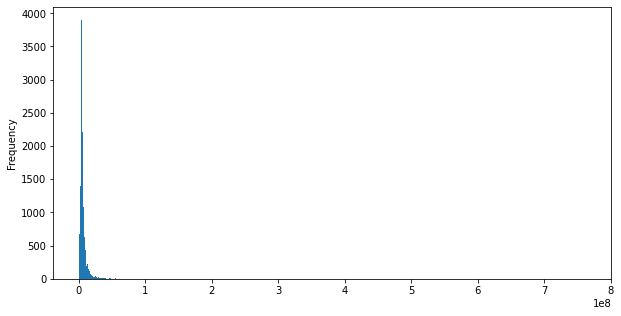

In [114]:
data['last_price'].plot.hist(bins=899, figsize=(10,5))

Посмотрю минимальную цену за квартиру


In [115]:
data['last_price'].min()

12190.0

12 тр - очень маленькая цена.

In [116]:
data.query('last_price<13000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year,isna_de,price_metre,publication_day,month,type_floor,cityCenters_nearest_km
8004,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,NaN,8.0,2019,False,111.834862,2,3,последний,9.0


Похоже на опечатку в стоимости, тк квартира площадью 109 кв м с двумя комнатами. Выведу аналогичные квратиры и посмотрю их стоимость. 

In [117]:
data.query('total_area>100 and rooms==2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year,isna_de,price_metre,publication_day,month,type_floor,cityCenters_nearest_km
128,8,16912000.0,105.7,2016-12-09,2,2.70,3,48.4,1,False,...,3,179.0,390.0,2016,False,1.600000e+05,4,12,первый,27.0
238,12,39900000.0,140.6,2016-11-19,2,3.50,8,39.8,7,False,...,3,99.0,NaN,2016,True,2.837838e+05,5,11,другой,7.0
256,17,37000000.0,115.0,2018-11-15,2,2.65,5,65.0,2,False,...,2,663.0,158.0,2018,False,3.217391e+05,3,11,другой,2.0
302,12,7500000.0,124.8,2018-04-25,2,2.65,4,37.1,1,False,...,0,NaN,NaN,2018,True,6.009615e+04,2,4,первый,35.0
526,1,15300000.0,113.1,2016-02-02,2,3.00,6,48.2,2,False,...,1,547.0,317.0,2016,False,1.352785e+05,1,2,другой,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,15,13900000.0,108.0,2018-10-25,2,2.65,5,46.4,4,False,...,1,297.0,132.0,2018,False,1.287037e+05,3,10,другой,5.0
19617,6,18500000.0,110.0,2018-08-03,2,3.00,6,72.0,5,False,...,1,346.0,12.0,2018,False,1.681818e+05,4,8,другой,4.0
20073,15,10900000.0,145.0,2017-04-17,2,3.50,2,39.0,2,False,...,3,153.0,188.0,2017,False,7.517241e+04,0,4,последний,27.0
20526,2,5800000.0,115.0,2017-09-12,2,2.65,1,40.0,1,False,...,0,NaN,124.0,2017,False,5.043478e+04,1,9,первый,35.0


Таким образом, кажется, квартира стоит 12 млн рублей. Изменю ее стоимость

In [118]:
data['last_price'] = data['last_price'].where(data["last_price"]>13000, data["last_price"]*1000)

Посмотрю количество квартир, цена которых менее 500 тр

In [119]:
data.query('last_price<500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year,isna_de,price_metre,publication_day,month,type_floor,cityCenters_nearest_km
5173,7,450000.0,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,0,NaN,233.0,2017,False,10714.285714,0,7,первый,NaN
8741,7,450000.0,43.4,2018-08-31,2,2.65,5,30.3,3,False,...,0,NaN,96.0,2018,False,10368.663594,4,8,другой,NaN
9813,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,...,0,NaN,719.0,2016,False,16838.487973,3,5,последний,NaN
14608,8,480000.0,32.0,2019-01-06,1,2.65,2,16.0,1,False,...,0,NaN,83.0,2019,False,15000.000000,6,1,первый,NaN
15892,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,0,NaN,NaN,2019,True,14144.736842,0,4,первый,NaN
16087,0,450000.0,36.5,2018-02-01,1,2.65,5,17.3,4,False,...,0,NaN,120.0,2018,False,12328.767123,3,2,другой,NaN
17172,1,470000.0,41.0,2018-02-11,1,2.65,5,32.0,3,False,...,0,NaN,46.0,2018,False,11463.414634,6,2,другой,NaN
21377,11,470000.0,44.5,2018-07-02,2,2.65,2,28.0,2,False,...,0,NaN,298.0,2018,False,10561.797753,0,7,последний,NaN


Выбивающихся значений нет

In [120]:
data['last_price'] = data['last_price']/1000000

<AxesSubplot:ylabel='Frequency'>

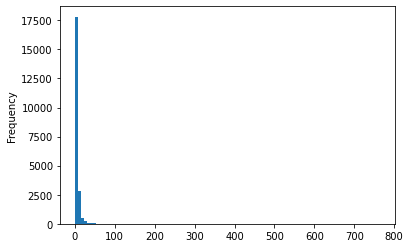

In [121]:
data['last_price'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

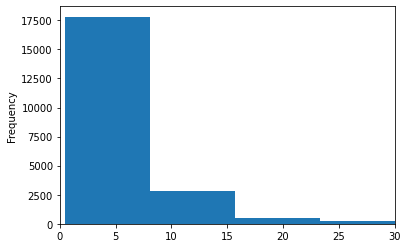

In [122]:
data['last_price'].plot.hist(xlim=(0,30), bins=100)

Большинство квартир стоят до 8 млн рублей. Посмотрю на распределение в рамках стоимости от 0 до 10 млн

<AxesSubplot:ylabel='Frequency'>

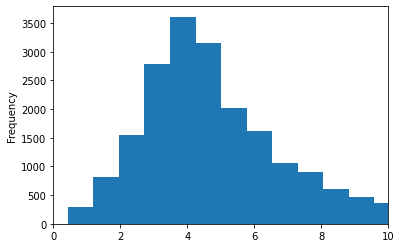

In [123]:
data['last_price'].plot.hist(xlim=(0,10), bins=1000)

Таким образом, наиболее популярные квартиры те, которые стоят от 3 до 6 млн рублей. Таких квартир более 40% из всей выборки

In [124]:
len(data.query('3<last_price<6'))

11138

#### Количество комнат

Посмотрю на график распределения комнат

<AxesSubplot:ylabel='Frequency'>

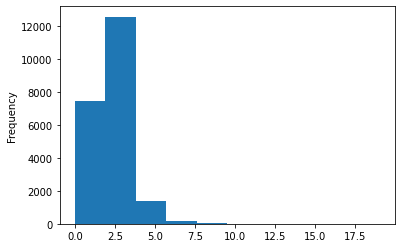

In [125]:
data['rooms'].plot.hist(bins=10)

График показывает, что есть квартиры с 0 комнатами. Это могут быть студии. Если это так, то значит данные имеют место быть. Если квартира не студия и 0 комнат, то скорее всего - ошибка в объявлении. Значит, надо удалить такие данные.

In [126]:
len(data.query('rooms==0'))

179

In [127]:
len(data.query('rooms==0 and studio==True'))

124

Всего квартир с 0 комнатами 179 шт, но студий из них 124. Следовательно в 55 объявлении ошибки. Удалим эти квартиры.

In [128]:
data = data[~((data['rooms']==0)&(data['studio']==False))]

<AxesSubplot:ylabel='Frequency'>

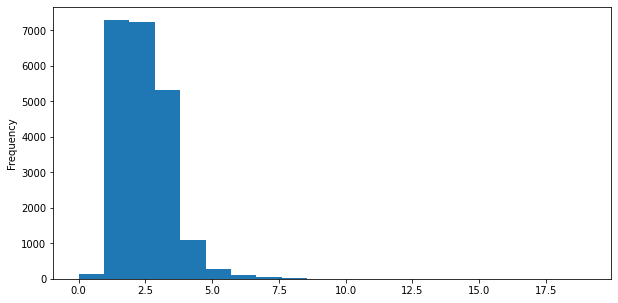

In [129]:
data['rooms'].plot.hist(bins=20, figsize=(10,5))

Таким образом, самые популярные квартиры - 1-3 комнатные. 4х комнатных квартир - около 1000. 
И совсем небольшую долю занимают квартиры от 5 комнат

#### Высота потолков

<AxesSubplot:ylabel='Frequency'>

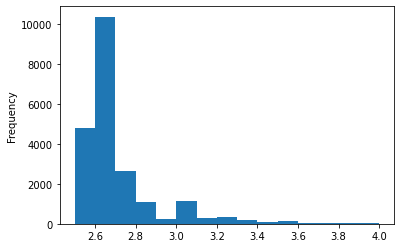

In [130]:
data['ceiling_height'].plot.hist(bins=15)

С учетом заполнения пропущенных значений- больше всего квратир с высотой потолкой 2,6 м. 

In [131]:
len(data.query('ceiling_height>3.5'))/len(data)*100

1.0133878765340274

Квартир с высотой потолков от 3,5 м всего около одного процента в выборке.

Аномальных значений не нашел

#### Этаж квартиры

<AxesSubplot:ylabel='Frequency'>

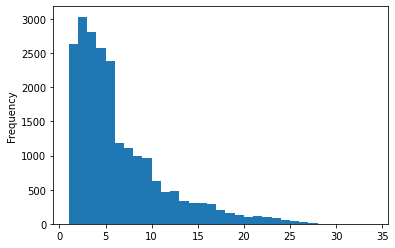

In [132]:
data['floor'].plot.hist(bins=range(1,35))

Видно, что на графике большое количество квартир, которые находятся на 2-3 этажах. ПРимерно одинаковые по популярности  квартиры на 1,4,5 этажах.

<AxesSubplot:ylabel='floor'>

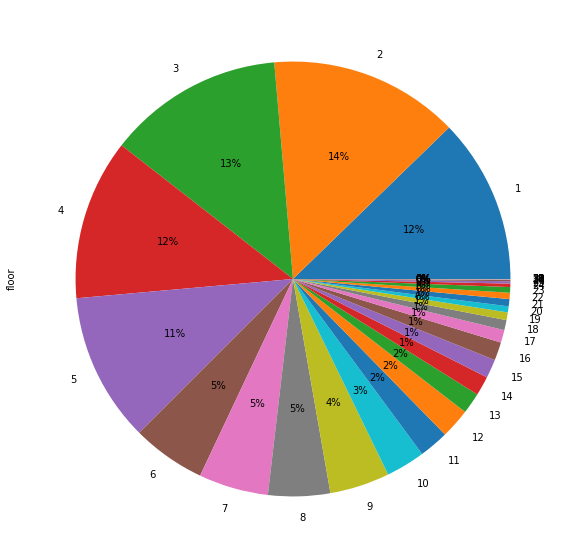

In [133]:
data.groupby(['floor'])['floor'].count().plot(kind='pie', y='floor', autopct='%1.0f%%', figsize=(10,10))

#### Тип этажа

In [134]:
data.groupby('type_floor')['type_floor'].count()

type_floor
другой       15837
первый        2638
последний     3037
Name: type_floor, dtype: int64

Больше всего продавалось квартир не на первом и не на последнем этажах, что не удивительно. Ведь часто люди смотрят не крайние этажи, тк как боятся, что могут протечь крыши или произойти другие ситуации.

#### Общее количество этажей в доме

<AxesSubplot:ylabel='Frequency'>

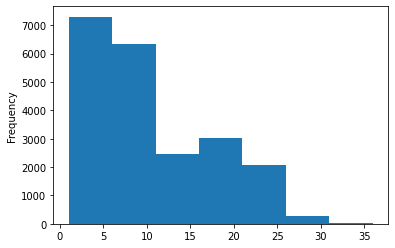

In [135]:
data['floors_total'].plot.hist(bins=7)

<AxesSubplot:ylabel='Frequency'>

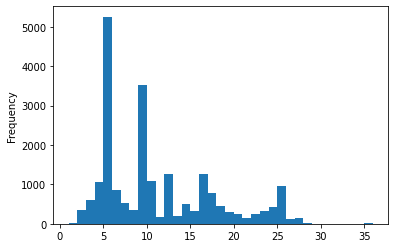

In [136]:
data['floors_total'].plot.hist(bins=35)

наиболее популярные дома - это пяти и девятиэтажки.

в целом встречаются дома с - 4, 5, 9, 12, 16, 25 этажами. Остальные постройки более редкие.

#### Расстояние до центра города в метрах

In [137]:
data['cityCenters_nearest'].max()

65968.0

In [138]:
data['cityCenters_nearest'].min()

181.0

<AxesSubplot:ylabel='Frequency'>

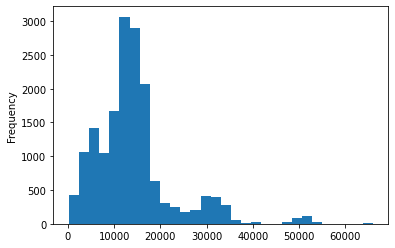

In [139]:
data['cityCenters_nearest'].plot.hist(bins=30)

Стоит сделать замечание. В данных не сказано до центра какого города указано расстояние. Буду считать, что до центра СпБ.

Основная часть квартир расположены в радиусе 10-18 км от центра. Это в райнах окраин города. 

#### Расстояние до ближайшего аэропорта

<AxesSubplot:ylabel='Frequency'>

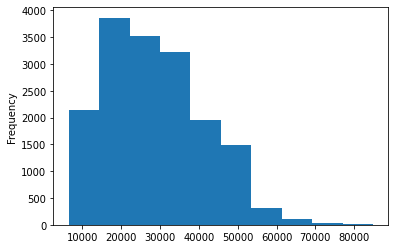

In [140]:
data['airports_nearest'].plot.hist()

Почти половина квартир удалена от аэропорта на расстояние 15-37 км. 

#### Расстояние до ближайшего парка

In [141]:
len(data[data['parks_nearest'].notna()])

7389

Почти у половины квартир находится рядом парк, если верить объявлениям.

<AxesSubplot:ylabel='Frequency'>

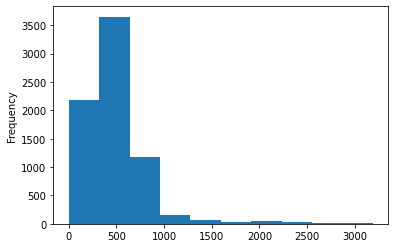

In [142]:
data['parks_nearest'].plot.hist()

Из этой половины почти у 6,5 т квартир парк находится в радиусе до 600 м, что повышает привлекательность публикации 

#### День и месяц публикации объявления

<AxesSubplot:ylabel='Frequency'>

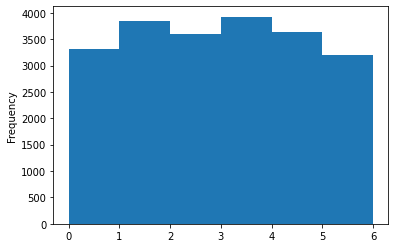

In [143]:
data['publication_day'].plot.hist(bins=6)

В целом распределение публикаций по дням недели равномерно. Но по пн и ср выкладывали больше объявлений, чем в другие дни

<AxesSubplot:ylabel='month'>

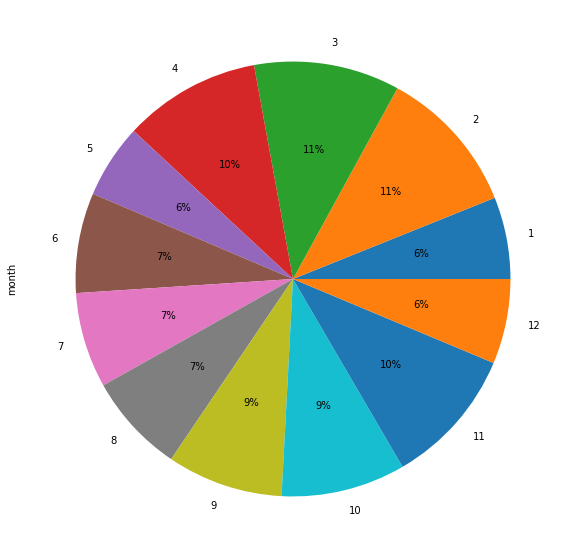

In [144]:
data.groupby(['month'])['month'].count().plot(kind='pie', y='floor', autopct='%1.0f%%', figsize=(10,10))

In [145]:
data.groupby(['month'])['month'].count().sort_values(ascending=False)

month
2     2353
3     2333
11    2211
4     2197
10    1989
9     1856
6     1600
8     1592
7     1527
12    1358
1     1310
5     1186
Name: month, dtype: int64

Хочу посмотреть не дни публикации объявлений, а дни продажи.

In [146]:
df = data[['first_day_exposition', 'days_exposition']]

In [147]:
df = df[df['days_exposition'].notna()]

In [148]:
df['days_exposition'] = df['days_exposition'].astype(int)

In [149]:
df['days_exposition'] = pd.to_timedelta(df['days_exposition'], unit='D')

In [150]:
from datetime import datetime, timedelta

In [151]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [152]:
df['last_day']= df['first_day_exposition'] + df['days_exposition']

In [153]:
df['day'] = df['last_day'].dt.weekday

In [154]:
df.groupby('day')['day'].count().sort_values()

day
6    1657
5    2022
4    2767
2    2789
3    2830
0    3020
1    3474
Name: day, dtype: int64

ТАким образом, пн и вт самые популярные дни продаж квартир. Меньше всего сделок состоится по вс

#### Описание времени продажи квартиры

In [155]:
data['days_exposition'].mean()

185.1618621692979

In [156]:
data['days_exposition'].median()

101.0

Среднее и медиана очень сильно отличаются. Значит, есть публикации, которые очень долго не продавались.

Построю boxplot

<AxesSubplot:>

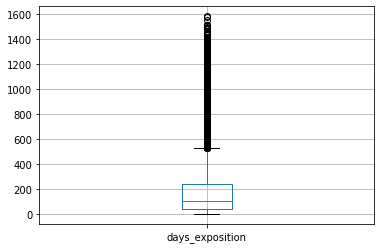

In [157]:
data.boxplot(column='days_exposition')


In [158]:
data['days_exposition'].quantile(0.25)

44.00000000000001

In [159]:
data['days_exposition'].quantile(0.75)

239.0

In [160]:
data['days_exposition'].quantile(0.75) + 1.5*(data['days_exposition'].quantile(0.75)-data['days_exposition'].quantile(0.25))

531.5

диаграмма размаха показывает, что большая часть значений лежит за пределами полутора межквартильтных размаха. 

Медианное значение длительности продажи квартиры - 101 день. Значения, которые расположены до верхнего уса (531 дней), можно считать допустимыми. 75% квартир были проданы за 239 дней (8 мес). 

В целом нормальным сроком продажи можно считать значения, лежащие в межквартильном диапазоне. То есть от 44 до 239 дней. (что говорит группировка по годам (в 2019 году срок продажи был 30 дней, в ранние годы больше)

Быстрыми продажами можно считать те, срок которых менее 44 дней (1,5 мес)\

Есть и объявления, которые продавались очень долго (более 531 дня). Максимальное значение достигает почти 4,5 года.

#### Анализ влияния факторов на общую стоимость квартиры


        - стоимость;
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год);

Построю корреляционную матрицу и графики рассеяния.

In [161]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'publication_day', 'month', 'year']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,publication_day,month,year
last_price,1.000000,0.634016,0.557039,0.441821,0.357110,-0.000953,0.000785,-0.037833
total_area,0.634016,1.000000,0.938522,0.596852,0.776774,-0.007322,0.003838,-0.080231
living_area,0.557039,0.938522,1.000000,0.417222,0.852336,-0.006104,-0.002237,-0.071291
kitchen_area,0.441821,0.596852,0.417222,1.000000,0.264567,-0.010515,0.003274,-0.056658
rooms,0.357110,0.776774,0.852336,0.264567,1.000000,-0.002869,-0.002926,-0.054411
publication_day,-0.000953,-0.007322,-0.006104,-0.010515,-0.002869,1.000000,0.012528,-0.007337
month,0.000785,0.003838,-0.002237,0.003274,-0.002926,0.012528,1.000000,-0.255884
year,-0.037833,-0.080231,-0.071291,-0.056658,-0.054411,-0.007337,-0.255884,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='publication_day', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='publication_day', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='total_area'>,
        <AxesSubplot:xlabel='year', ylabel='total

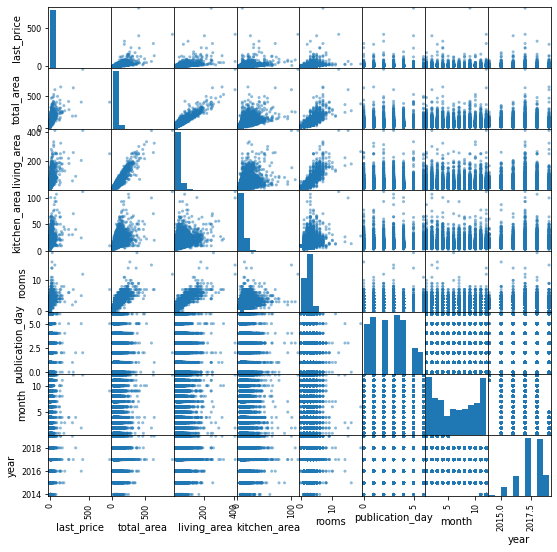

In [162]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'publication_day', 'month', 'year']], figsize=(9, 9))

##### Общая площадь - цена

(0.0, 200.0)

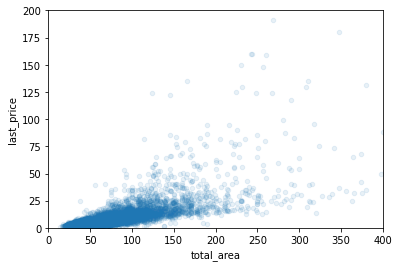

In [163]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
plt.xlim(0,400)
plt.ylim(0,200)

In [164]:
data['total_area'].corr(data['last_price'])

0.6340155189485677

Наблюдается закономерность: в целом квартиры до 150 кв метров и до 30 млн руб имеют связь. Чем больше жилая площадь квартиры, тем больше ее стоимость. Потом данные уже идут вразброс.

По кф корреляции можно сказать, что связь между этими величинами умеренная. Все-таки до определенного значения связь наблюдается, затем становится не такой явной.

##### Жилая площадь - цена

(0.0, 200.0)

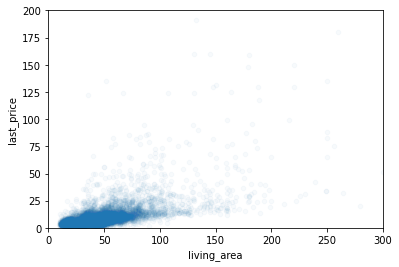

In [165]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03) 
plt.xlim(0,300)
plt.ylim(0,200)

In [166]:
data['living_area'].corr(data['last_price'])

0.5570394905193354

Связь между жилой площадью и стоимостью не такая тесная. но все же есть. В целом с увеличением жилой площади увеличивается и цена квартиры. Но данная тенденция наблюдается до 100 кв м и ло 25 млн рублей. При бОльших значениях данные разбросаны.

##### Плоащадь кухни - цена

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

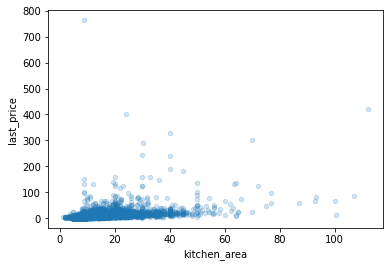

In [167]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2) 


In [168]:
data['kitchen_area'].corr(data['last_price'])

0.4418211351933687

В целом, с увеличением кухни квартира сильно не растет в цене. На это  указывает и кф корреляции. ДА, небольшая связь есть, но несущественная.

##### Количество комнат - цена

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

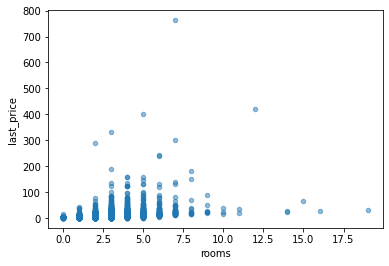

In [169]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5) 


In [170]:
data['rooms'].corr(data['last_price'])

0.35710969957991556

Связи между количеством комнат и стоимостью квартиры практически нет. квартиры с 1-2 комнатами могут стоить также как и с 5-6 комнатами. Стоит отметить, что квартиры с 3 и более комнатами чаще стоят от 100 млн рублей.

##### Тип этажа - цена

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

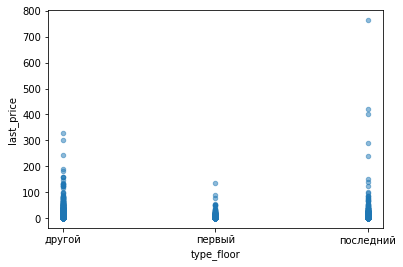

In [171]:
data.plot(x='type_floor', y='last_price', kind='scatter', alpha=0.5) 


Этаж не влияет на стоиомсть квартиры. В целом данные распределены равномерно. Есть несколько квартир, которые находятся не на первом этаже и их стоимость более 200 млн руб. Но скорее на это влияют другие параметры.

##### День публикации - цена

<AxesSubplot:xlabel='publication_day', ylabel='last_price'>

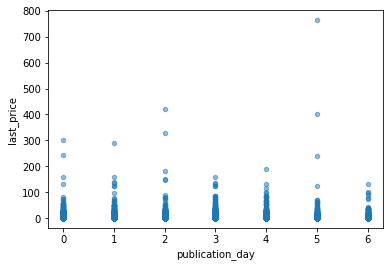

In [172]:
data.plot(x='publication_day', y='last_price', kind='scatter', alpha=0.5) 


In [173]:
data['publication_day'].corr(data['last_price'])

-0.0009533432915258941

Я не наблюдаю зависимость цены от дня недели. Ведь день недели не влияет качественно на квартиру.

##### Месяц и год публикации - цена

<AxesSubplot:xlabel='month', ylabel='last_price'>

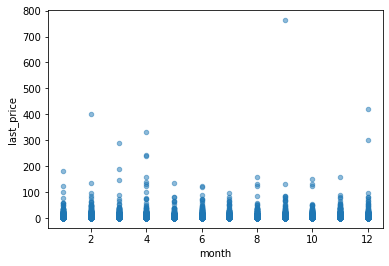

In [174]:
data.plot(x='month', y='last_price', kind='scatter', alpha=0.5) 


<AxesSubplot:xlabel='year', ylabel='last_price'>

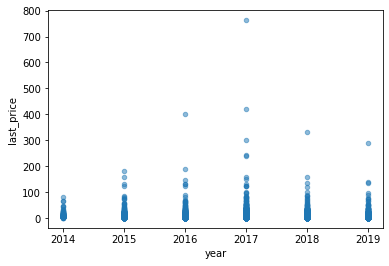

In [175]:
data.plot(x='year', y='last_price', kind='scatter', alpha=0.5) 


Аналогично с месяцем и годом публикации. Явной связи не наблюдаю.

Конечно в рамках годов может наблюдаться тенденция, что квартиры растут в цене. Но это нужно изучать аналогичные квартиры по схожим параметрам. (сравнивать сколько стоила аналогичная квартира n лет назад и сейчас).

#### Цена квадратного метра

In [176]:
data_sq_met = data.groupby('locality_name')[['last_price']].count().sort_values(by = 'last_price', ascending=False).head(10)

In [177]:
data_sq_met = data_sq_met.rename({'last_price': 'total'}, axis=1)

In [178]:
data_sq_met['avarage_price_sq_m'] = data.groupby('locality_name')['last_price'].sum()/data.groupby('locality_name')['total_area'].sum()

In [179]:
data_sq_met.sort_values(by='avarage_price_sq_m', ascending=False)

,total,avarage_price_sq_m
locality_name,,
Санкт-Петербург,14389,0.123009
Пушкин,341,0.105175
Кудрово,408,0.094301
поселок Парголово,297,0.087887
Петергоф,197,0.085242
поселок Мурино,482,0.083451
поселок Шушары,402,0.076438
Колпино,327,0.074354
Гатчина,292,0.068399


Самая высокая средняя стоимость кв метра в Спб, она составляет 123 тр. Десятку замыкает Красное село, где ср стоиомсть кв метра составляет 69,5 тр.

#### Средняя цена в зависимости от удаленности от центра по км

<AxesSubplot:xlabel='cityCenters_nearest_km'>

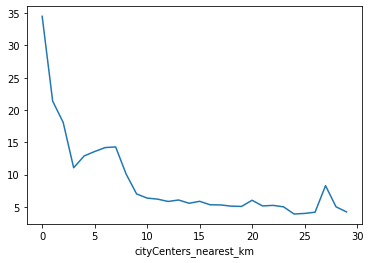

In [184]:
# Код 
data[data['locality_name']=="Санкт-Петербург"].groupby('cityCenters_nearest_km')['last_price'].mean().plot()

Небольшая связь прослеживается. Если расстояние до центра в районе 8 км, то стоимость квартиры может быть более 100 млн р.

Квартиры, которые находятся от центра города на расстоянии 8 км, чаще могут стоить от 50 млн р.

в целом с увеличением расстояния до центра стоимость остается прежней.

### Общий вывод

Таким образом, были изучены данные по продажам квартирам. 

В ходе работы я сделал следующие:
- изучил данные
- очистил их от пропусков
- очистил от выбросов
- провел анализ.


Я пришел к следующим выводам:

    - наибольшее влияние на стоимость объекта оказывают общая площадь квартиры, жилая площадь и площадь кухни (но сами по себе эти данные тесно связаны и зависят друг от друга)
    - пользователи равномерно публикуют объявления (нет популярных дней для публикации)
    - 